In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from recognize_character import *

In [35]:
path = 'word-images/word2.png'
word = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [36]:
kernel = np.ones((5,5),np.uint8)
_, word = cv2.threshold(word,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
word = 255 - word
#word = cv2.erode(word,kernel,iterations = 1)



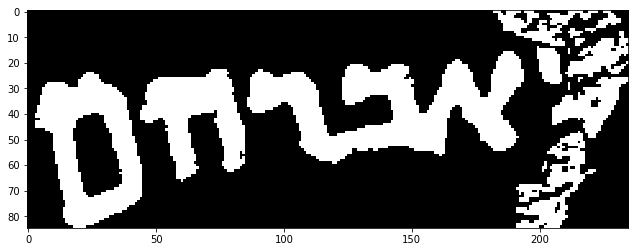

In [37]:
plt.figure(figsize = (500,4))
plt.imshow(word, cmap='gray', aspect = 1)
plt.show()

In [38]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(word, 8, cv2.CV_32S)

In [39]:
n_labels

16

In [40]:
stats = stats[stats[:,0].argsort()]
stats

array([[    0,     0,   235,    85, 14126],
       [    3,    24,    42,    61,  1295],
       [   44,    23,    41,    44,   951],
       [   86,    16,   108,    44,  2209],
       [  182,     0,    41,    14,   225],
       [  191,    47,    31,    38,   441],
       [  199,    14,    10,    15,   108],
       [  201,    59,     2,     4,     5],
       [  205,    26,    30,    24,   330],
       [  210,     8,    25,    18,   216],
       [  211,     7,     6,     4,    13],
       [  211,    15,     1,     2,     2],
       [  211,    28,     1,     3,     3],
       [  214,    11,     4,     3,     9],
       [  215,    26,     2,     2,     3],
       [  218,     0,    14,     9,    39]], dtype=int32)

In [41]:
idx = 1
char = word[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]]
ch_height, ch_width = char.shape
#padding = np.zeros((char.shape[0], char.shape[1]))
#print(padding.shape)
#print(char.shape)
#char = np.concatenate((padding,char), axis = 1)
#char = np.concatenate((char,padding), axis = 1)
#char = char.astype(np.uint8)

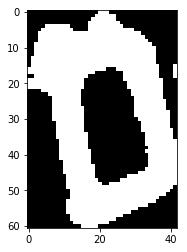

In [42]:
plt.figure(figsize = (500,4))
plt.imshow(char, cmap='gray', aspect = 1)
plt.show()

In [43]:
#template = cv2.imread('templates/he.png', cv2.IMREAD_GRAYSCALE)
#_, template = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#template = 255 - template
#template = cv2.resize(template, (ch_width, ch_height))
#plt.figure(figsize = (500,4))
#plt.imshow(template, cmap='gray', aspect = 1)
#plt.show()

In [44]:
recognize_character(char)

([0.5907718539237976,
  0.5997929573059082,
  0.704340934753418,
  0.5382214188575745,
  0.5440204739570618,
  0.6756431460380554,
  0.6794424653053284,
  0.7218555808067322],
 'kaf')